<a href="https://colab.research.google.com/github/K-osA/2022S-ML/blob/main/HW1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: Data preprocessing & KNN

데이터를 불러오는 방법에는 크게 두 가지가 있습니다.
1. 제공된 csv 파일을 코랩 노트북 파일이 있는 드라이브 폴더 경로에 업로드하기
  * 본 노트북 파일과 csv 파일을 같은 드라이브 폴더에 넣기 
  * 아래의 **`코랩과 구글 드라이브 연동하기`** 코드를 사용하여 본인 계정의 구글 드라이브와 코랩 환경을 연동하여 사용
  * 연동하는 코드를 사용하지 않고, **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 아래에 세 번째 아이콘(드라이브 마운트) 클릭`** 으로도 구글 드라이브와 해당 코랩 세션을 연동할 수 있음
2. 제공된 csv 파일을 직접 코랩 노트북에 업로드하기
  * 코랩 화면에서 **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 바로 밑에 있는 아이콘(세션 저장소에 업로드) 클릭>로컬에서 파일 업로드`**

어느 방법을 사용하셔도 상관 없습니다. 하지만 리눅스 계열 명령어(pwd, ls, cd) 등을 이용해서 경로를 잘 확인해주세요. 경로를 맞추지 않으면 csv 파일을 불러올 때 에러가 발생합니다. 아래 코드는 코랩과 구글 드라이브를 코드로 연결하는 방법입니다.

## 코랩과 구글 드라이브 연동하기

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# pwd 명령어로 현재 위치 확인
!pwd

/content/drive


In [54]:
ls

MyDrive/  Shareddrives/


In [55]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive


## 데이터 불러오기 & 살펴보기

In [56]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리, 
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
path = './MyDrive/heart.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [58]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (1190, 12) => 1190 개의 row(행), 12 개의 column(열)을 가진 데이터

(1190, 12)

In [59]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51,M,ASY,128,0,0,Normal,107,N,0.0,Up,0
1,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1


In [60]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1185,41,M,NAP,130,214,0,LVH,168,N,2.0,Flat,0
1186,63,M,ASY,150,0,0,Normal,86,Y,2.0,Flat,1
1187,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
1188,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1
1189,49,M,ATA,130,266,0,Normal,171,N,0.6,Up,0


In [61]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [62]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [63]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.425210,132.413445,199.714286,0.236975,137.127731,0.871176,0.560504
std,9.476581,18.270433,109.352682,0.425405,25.259171,1.053458,0.496534
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,224.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 문제 1

* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 기술 형식 : 1. 변수 이름: categorical, nominal 
  * 타입은 대분류, 소분류 형식으로 적으세요. 예) 대분류(categorical), 소분류(nomial)

답)
1. Age: numeric, discrete
2. Sex: categorical, nominal
3. ChestPainType: categorical, nominal
4. RestingBP: numeric, discrete
5. Cholesterol: numeric, discrete
6. FastingBS: categorical, nominal
7. RestingECG: categorical, nominal
8. MaxHR: numeric, discrete
9. ExerciseAngina: categorical, nominal
10. Oldpeak: numeric, continuous
11. ST_slope: categorical, ordinal
12. HeartDisease: categorical, nominal

## 문제 2
* 중복값을 확인하고 중복값을 제거한 후 DataFrame의 차원을 확인하는 코드를 작성하여 캡처 후 보고서에 업로드하세요.

In [64]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [66]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [67]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

272

In [68]:
################  문제 2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

print(data[data.duplicated()]) # 중복된 값 확인 (결과에서 272개의 중복된 값이 있는 것까지 확인 가능)
data = data.drop_duplicates() # 중복된 값 제거
print(data.shape) # 차원 확인

# data.shape의 결과까지 캡처하여 보고서에 업로드 하세요.

################ 코드 끝  #####################

      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
89     41   M           NAP        112          250          0     Normal   
100    62   M           ASY        135          297          0     Normal   
105    62   M            TA        120            0          1        LVH   
106    60   M           ASY        125            0          1     Normal   
140    63   M           NAP        133            0          0        LVH   
...   ...  ..           ...        ...          ...        ...        ...   
1175   67   M           ASY        160          384          1         ST   
1177   34   M           ATA        150          214          0         ST   
1179   55   M           NAP        136          228          0         ST   
1181   42   M           NAP        134          240          0     Normal   
1183   55   M           ASY        132          353          0     Normal   

      MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
89      179   

## 문제 3
* outlier 처리하기


### 문제 3-1
* Age, RestingBP, Cholesterol, MaxHR, Oldpeak column에 대해 각각 box plot을 그리고 캡처하여 결과를 보고서에 업로드하세요. (box plot을 그리는 모든 패키지 사용 가능)
  * column의 이름이 box plot의 x축에 나타나도록 하세요.
* outlier가 있는 column의 이름을 모두 보고서에 쓰세요.

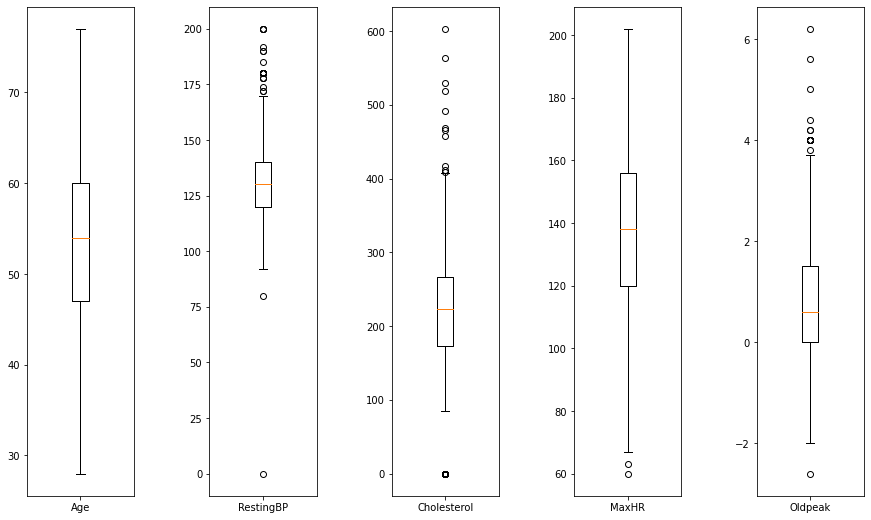

In [69]:
## 코드 작성

fig, ax = plt.subplots(1, 5) # 하나의 row, 5개의 columns -> 5개의 플롯을 그릴 곳을 생성.

fig.set_size_inches(15, 9) # figure 사이즈 설정
plt.subplots_adjust(wspace = 0.7, hspace = 0.7) # 각 subplot간 여백 생성

ax[0].boxplot([data.Age]) # Age에 대한 boxplot 그리기
ax[0].set_xticklabels(['Age']) # x축에 이름넣기

ax[1].boxplot([data.RestingBP]) # RestingBP에 대한 boxplot 그리기
ax[1].set_xticklabels(['RestingBP']) # x축에 이름넣기

ax[2].boxplot([data.Cholesterol]) # Cholesterol에 대한 boxplot 그리기
ax[2].set_xticklabels(['Cholesterol']) # x축에 이름넣기

ax[3].boxplot([data.MaxHR]) # MaxHR에 대한 boxplot 그리기
ax[3].set_xticklabels(['MaxHR']) # x축에 이름넣기

ax[4].boxplot([data.Oldpeak]) # Oldpeak에 대한 boxplot 그리기
ax[4].set_xticklabels(['Oldpeak']) # x축에 이름넣기

plt.show() # 만들어진 그래프 표시

### 문제 3-2
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해서 outlier를 제거하는 함수 extract_outliers() 의 빈 칸을 채워 outlier를 찾으세요.
  * 입력: 원본 데이터, outlier가 있다고 판단한 열 하나
  * 출력: outlier들만 있는 DataFrame

In [70]:
def extract_outliers(data,col):

  q1 =  data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  ################  문제 3-2  ####################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  #####################
  
  iqr = q3 - q1 # iqr 크기 계산
  max = q3 + iqr * 1.5 # 이 값보다 크면 outlier
  min = q1 - iqr * 1.5 # 이 값보다 작아도 outlier

  out = data[(data[col]<min) | (data[col]>max)]
  # 결론적으로 min, max 바깥에 있는 값은 outlier.

  ################ 코드 꿑  ######################
  return out 

### 문제 3-3
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해 문제 3-2의 extract_outliers()를 사용하여 원본 데이터프레임(data)에서 outlier를 제거한 DataFrame data_clean을 만드세요. 

In [71]:
out_restingBP = extract_outliers(data, "RestingBP")
out_cholesterol = extract_outliers(data, "Cholesterol")
out_maxHR = extract_outliers(data, "MaxHR")
out_oldpeak = extract_outliers(data, "Oldpeak")

In [72]:
# 코드 작성
data_clean = pd.concat([data, out_restingBP]) # 원본과 RestingBP의 outlier 합치기
data_clean = pd.concat([data_clean, out_cholesterol]) # data_clean과 Cholesterol의 outlier 합치기
data_clean = pd.concat([data_clean, out_maxHR]) # data_clean과 MaxHR의 outlier 합치기
data_clean = pd.concat([data_clean, out_oldpeak]) # data_clean과 Oldpeak의 outlier 합치기

data_clean = data_clean.drop_duplicates(keep = False) # 중복된 것을 모두 지우면 outlier는 삭제된다.

In [73]:
## 본 코드의 결과를 캡처 후 보고서에 업로드하세요.

data_clean.shape

(702, 12)

## 문제 4


### 문제 4-1
* data_clean의 Sex 열의 데이터 값을 남성(M)일 경우 0, 여성(F)일 경우 1로 인코딩하세요.
* 인코딩 후 data_clean.head()의 결과를 보고서에 캡처하여 업로드하세요.

In [74]:
data_clean.loc[data_clean['Sex']=='M', 'Sex'] = 0 # M 찾으면 그 row의 Sex column을 0으로 바꿈
data_clean.loc[data_clean['Sex']=='F', 'Sex'] = 1 # F 찾으면 그 row의 Sex column을 1로 바꿈

data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,Y,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,N,0.0,Up,0


### 문제 4-2
* data_clean의 ExerciseAngina 열의 데이터 값을 N인 경우 0, Y인 경우 1로 인코딩하세요.

In [75]:
data_clean.loc[data_clean['ExerciseAngina']=='N', 'ExerciseAngina'] = 0 # N 찾으면 그 row의 ExerciseAngina column을 0으로 바꿈
data_clean.loc[data_clean['ExerciseAngina']=='Y', 'ExerciseAngina'] = 1 # Y 찾으면 그 row의 ExerciseAngina column을 1로 바꿈

data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,1,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,1,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,0,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,1,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,0,0.0,Up,0


### correlation 구하기
각 변수 별 correlation을 구하기 위해 Sex와 ExerciseAngina 열의 타입을 변경하기

In [76]:
data_clean.info()
# Sex와 ExerciseAngina의 데이터 타입이 object
# object -> int64로 타입 변환이 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    object 
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    object 
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 71.3+ KB


In [77]:
data_clean['Sex'] = data_clean['Sex'].astype('int64')
data_clean['ExerciseAngina'] = data_clean['ExerciseAngina'].astype('int64')

In [78]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    int64  
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    int64  
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 71.3+ KB


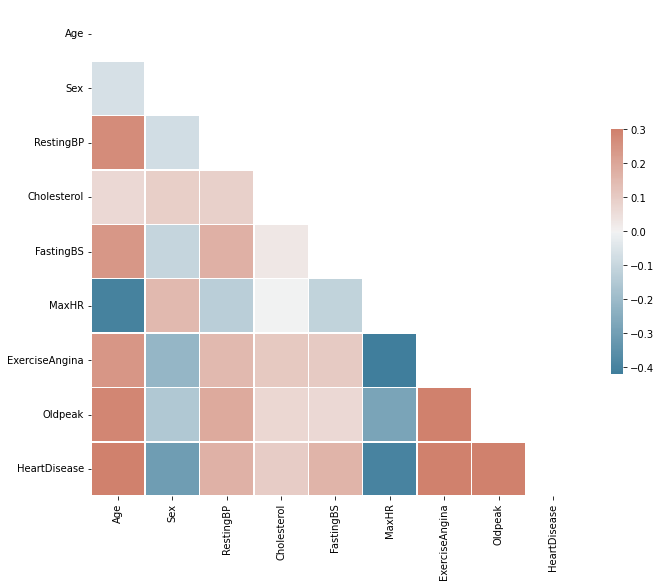

In [79]:
# correlation matrix 계산하기
corr = data_clean.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### 문제 4-3
* 위의 Heat map에서 HeartDisease 열과 연관성이 높은 Age, RestingBP, FastingBS, ExerciseAngina, Oldpeak 열만을 추출하여 data_final DataFrame을 만드세요. 
* HeartDisease 열도 data_final에 포함됩니다. 
* data_final.head()의 결과를 보고서에 업로드하세요.

In [80]:
data_final = data_clean[['Age', 'RestingBP', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'HeartDisease']]
data_final.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
1,48,140,0,1,1.5,1
2,64,142,0,1,1.0,1
3,40,130,0,0,0.0,0
4,63,130,1,1,1.8,1
6,60,102,0,0,0.0,0


## 문제 5
* KNN 이해하기

### train과 test set 나누기

In [81]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [82]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
data_final.shape

(702, 6)

In [83]:
# 변수들과 label로 활용할 것을 나누는 작업
X = data_final.drop(['HeartDisease'], axis=1)
y = data_final['HeartDisease']

In [84]:
# used random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [85]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train's shape :  (561, 5)
X_test's shape :  (141, 5)
y_train's shape :  (561,)
y_test's shape :  (141,)


### 문제 5-1, 5-2, 5-3

* 주어진 class Knn을 완성하여 test accuracy가 **0.65 이상**이 나오도록 코드를 완성하세요.


### 문제 5-1
* for문을 **한 번만 사용하여** 두 데이터 사이의 Euclidean Distance를 구하는 dist() 함수를 완성하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) numpy 에 있는 함수를 사용하세요.


### 문제 5-2
* predict() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) distance는 dictionary 입니다.

### 문제 5-3
* vote() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.

In [86]:
import tqdm

In [87]:
class Knn():
    
    def __init__(self, n_neighbors): 
        
        ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
        self.k = n_neighbors    
    
        ## knn 은 lazy learning 입니다.
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self, test) : 
        y_pred = []
        for i in tqdm.tqdm(range(test.shape[0])):

            ## distance는 dictionary
            ## dist() 구현 => 문제 5-1
            distance = self.dist(self.X, test.loc[i]) 
            ################  문제 5-2  ####################
            # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
            # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
            ################ 코드 시작  #####################
            labels=[] # labels는 list(dictionary가 들어갈것이다.)
            sorted_distance= sorted(distance.items(), key=lambda x: x[1]) # dist가 낮은 순으로 정렬(x상에서 0은 index, 1은 dist)
            for j in range(self.k): # k 갯수만큼의 dist가 있을 것임.
              labels.append(sorted_distance[j]) # labels list에 정렬된 dist를 순서대로 추가.

            ################ 코드 끝  #######################
            ###############################################
            

            ## labels: k개의 label을 모은 리스트
            ## selected: vote()를 통해 예측한 label 값
            ## vote() 구현 => 문제 5-3
            selected = self.vote(labels) 
   
            y_pred.append(selected)
            


        return y_pred ## 모든 비교가 끝나면 예측된 값이 저장된 y_pred 리스트를 반환합니다.
        

    ## dist: 거리를 계산하는 함수 
    def dist(self, X, y) :

        num_train = X.shape[0]
        dist_dict = {} ## {index : distance} 형태

        
        for i in range(num_train):
        
        ################  문제 5-1  ####################
        # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
        # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
          dist_dict[i] = np.linalg.norm(X.loc[i] - y) # X의 i row와 y의 Euclidean dist를 구하여 dictionary에 추가.
        ################ 코드 끝  ######################
        ##############################################

        return dist_dict ## dictionary


    ## vote: test 데이터의 label을 선택하는 함수
    def vote(self, labels):
      ## labels: k개의 label을 담고 있는 리스트
      selected = 0

      ################  문제 5-3  ####################
      # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
      # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
      ################ 코드 시작  #####################
      zero = 0 # heartdisease가 0인 갯수
      one = 0 # heartdisease가 1인 갯수
      for label in labels: # labels 갯수만큼 반복
        if self.y[label[0]] == 0: # label 인덱스가 가리키는 y_train(heartdisease)이 0이라면
          zero += 1 # zero를 1 더함.
        elif self.y[label[0]] == 1: # label 인덱스가 가리키는 y_train(heartdisease)이 1이라면
          one += 1 # one을 1 더함.

      if zero > one: # 0이 더많으면
        selected = 0 # selected는 0
      else: # 1이 더많으면
        selected = 1 # selected는 1

      ################ 코드 끝  ######################
      ##############################################

      return selected

In [88]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)

100%|██████████| 141/141 [00:25<00:00,  5.49it/s]


0.6879432624113475

### 문제 5-4
* 완성한 Knn을 사용하여 K 값에 따라 변화하는 train accuracy, test accuracy를 그래프로 그리세요.
* 소스코드와 그래프를 **함께** 캡처하여 보고서에 업로드하세요.

100%|██████████| 141/141 [00:25<00:00,  5.47it/s]


Text(0, 0.5, 'accuracy')

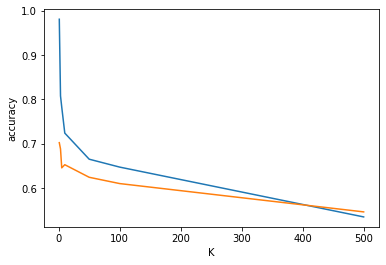

In [89]:
K = [1, 3, 5, 10, 50, 100, 500]
train_acc = []
test_acc = []

################  문제 5-4  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

for k in K: # K 순회
  classifier = Knn(k) # k값에 따른 classifier 생성
  classifier.fit(X_train, y_train) # Knn Class self 설정
  
  result_X_train = classifier.predict(X_train) # train set에 대해 predict 진행
  result_X_test = classifier.predict(X_test) # test set에 대해 predict 진행

  train_acc.append(accuracy_score(y_train, result_X_train)) # train set의 실제 label과 예측한 label의 score를 계산한 후 train_acc에 추가.
  test_acc.append(accuracy_score(y_test, result_X_test)) # test set의 실제 label과 예측한 label의 score를 계산한 후 test_acc에 추가.

################ 코드 끝  ######################
# x축을 K값, y축을 정확도로하여 K에 대한 train, test의 정확도에 대한 그래프 생성
plt.figure()
plt.plot(K, train_acc, label='train accuracy')
plt.plot(K, test_acc, label='test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')

### 문제 5-5
* Knn classifer의 정확도를 0.75 이상으로 개선하는 방법에 대해 고민해보세요.
* 패키지 사용 가능합니다.
* 힌트) HeartDisease 데이터의 0과 1의 비율에 대해서 생각해보세요. 
* 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요.

In [90]:
# 코드 개선
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler 사용을 위한 import
scaler = MinMaxScaler() # scaler에 MinMaxScaler 사용 준비

features=[['Age', 'RestingBP', 'FastingBS', 'ExerciseAngina', 'Oldpeak']] # train할 feature들을 미리 준비

for feature in features: # 각 feature별로 MinMaxScaler를 적용한다. (train data는 fit -> transform)
    X_train[feature] = scaler.fit_transform(X_train[feature])
for feature in features: # 각 feature별로 MinMaxScaler를 적용한다. (test data는 transform)
    X_test[feature] = scaler.transform(X_test[feature])


In [91]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)

100%|██████████| 141/141 [00:19<00:00,  7.18it/s]


0.8156028368794326